In [20]:
# 이전 챕터 모델

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                  restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20,
                    validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255
model.evaluate(test_scaled, test_target)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 107s 45ms/step - accuracy: 0.7506 - loss: 0.6924 - val_accuracy: 0.8791 - val_loss: 0.3263
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.8759 - loss: 0.3475 - val_accuracy: 0.8945 - val_loss: 0.2875
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.8950 - loss: 0.2949 - val_accuracy: 0.9094 - val_loss: 0.2451
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9078 - loss: 0.2535 - val_accuracy: 0.9114 - val_loss: 0.2390
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - accuracy: 0.9159 - loss: 0.2317 - val_accuracy: 0.9162 - val_loss: 0.2294
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.9228 - loss: 0.2077 - val_accuracy: 0.9157 - val_loss: 0.2300
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9301 - loss: 0.1900 - val_accuracy: 0.9164 - val_loss: 0.2208
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9336 

[0.2453479915857315, 0.9125999808311462]

In [21]:
model = keras.models.load_model('best-cnn-model.keras')

In [22]:
model.layers

[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_4, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_5, built=True>]

In [23]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [24]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.03734213 0.27001616


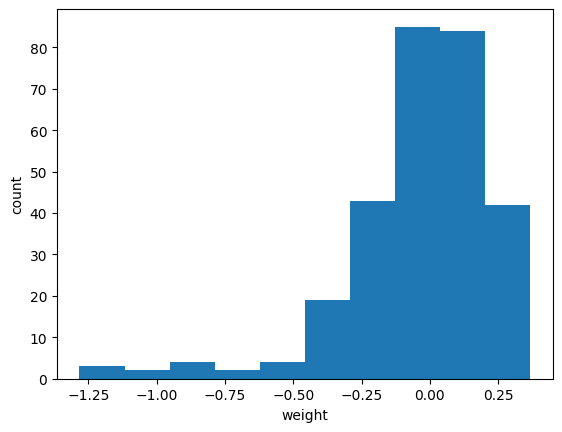

In [25]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')

plt.show()

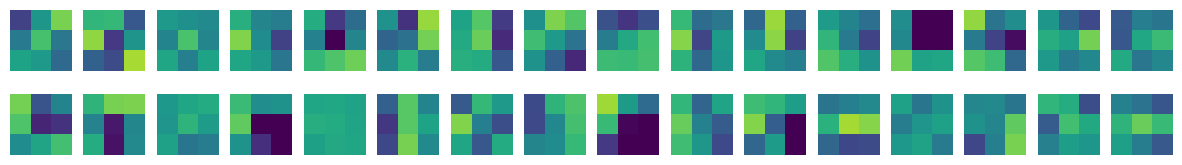

In [26]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')

plt.show()

In [27]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu',
                                          padding = 'same', input_shape = (28, 28, 1)))

In [28]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [11]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0011585256 0.08261896


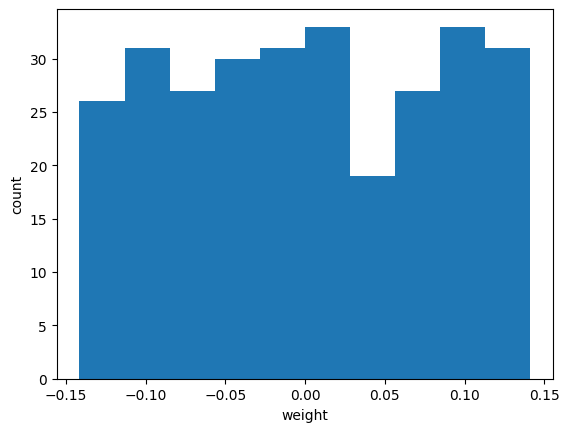

In [29]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')

plt.show()

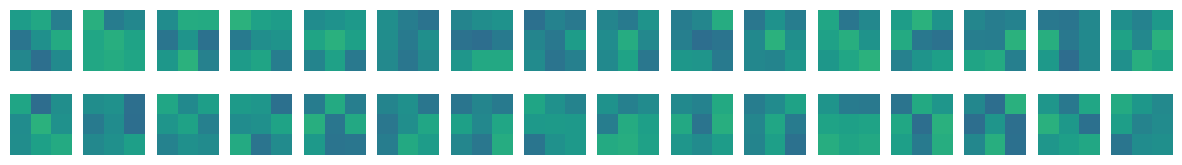

In [30]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')

plt.show()

In [31]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer_3>]


In [32]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

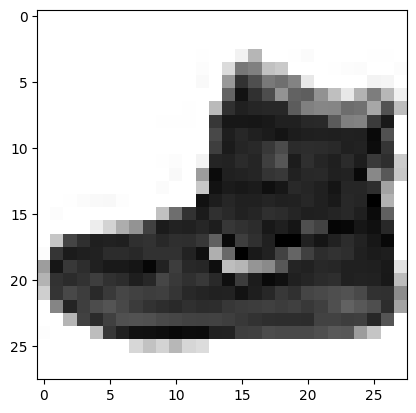

In [33]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')

plt.show()

In [34]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [35]:
print(feature_maps.shape)

(1, 28, 28, 32)


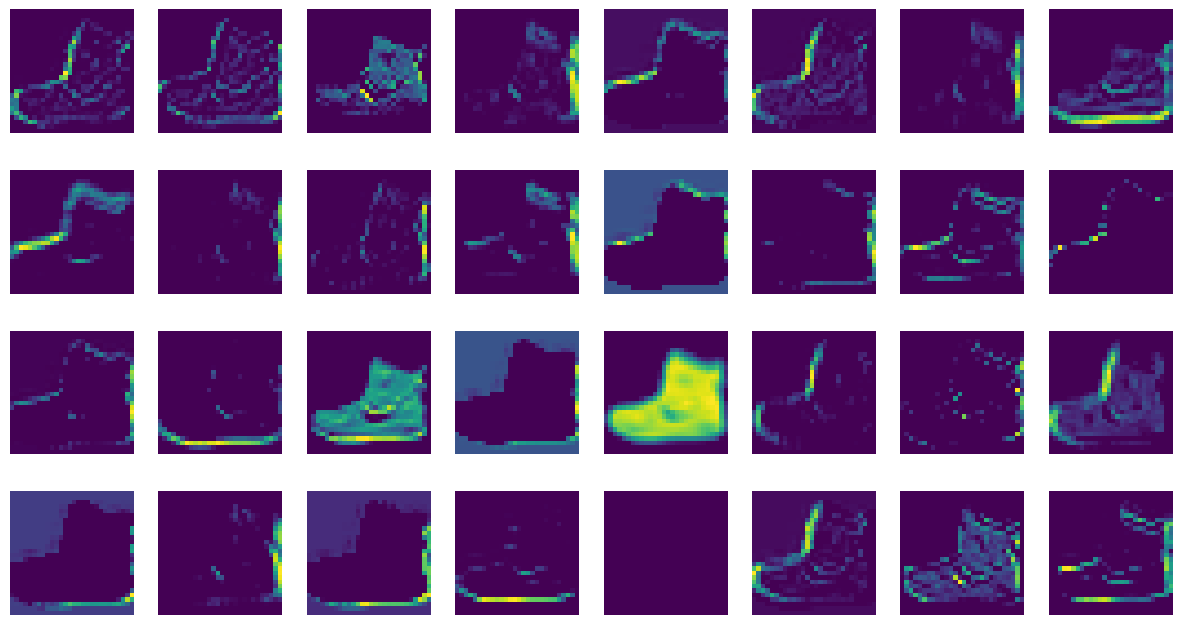

In [36]:
fig, axs = plt.subplots(4, 8, figsize = (15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')

plt.show()

In [37]:
conv_acti = keras.Model(model.inputs, model.layers[2].output)

In [38]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [39]:
print(feature_maps.shape)

(1, 14, 14, 64)


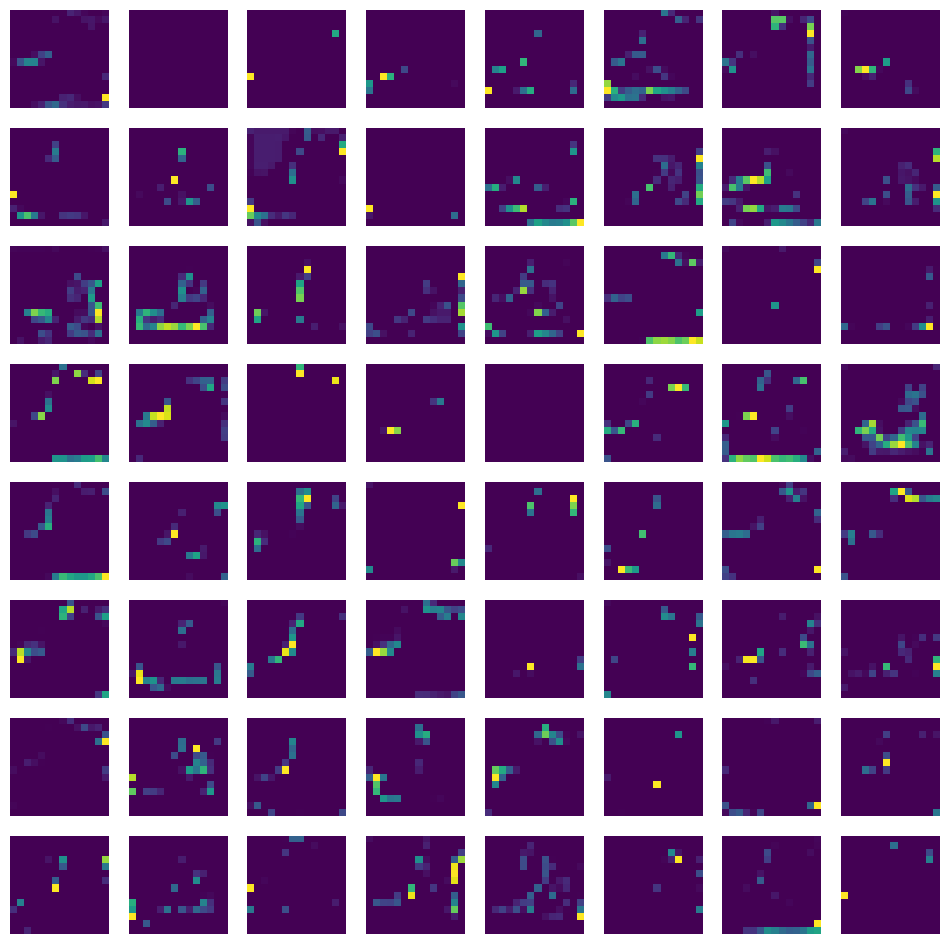

In [40]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')

plt.show()